## PROBNLEM STATEMENT

**Safe Travel Insurance Inc. specializes in risk management by approving customers claim.**

## ABOUT THE DATA

The dataset has details of 52310 train and 22421 test dataest with the following 11 features

## Columns

- Target: Claim Status (Claim)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Age of insured (Age)
- The identification record of every observation (ID)

## Why solve this project ?

# Import Libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import mode 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading file into df
df = pd.read_csv('C:\\Users\\nidhi\\Desktop\\Hackton\\GREYATOM\\file\\Data\\train.csv')

# Gaining basic Insights from the data and Data Cleansing

In [5]:
#Reading the top 5 rows of the dataset
df.head(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
#Reading the below 5 rows of the dataset
df.tail(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0
52309,4791,C2B,Airlines,Online,Annual Silver Plan,414,SINGAPORE,216.000000,54.0000,41,0


In [6]:
#Checking the dimensions of the dataset
df.shape

(52310, 11)

## Check for null values and get a summary of all the columns in the dataset

In [7]:
df.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

**As there is no missing values in columns, we are good to go!!**

In [8]:
#Checking datatypes
df.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                     int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [16]:
#Ananlysing basic statistical details
df.describe()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,6.280176,0.669012,0.982967,9.219595,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,2.625838,0.470573,0.129396,6.481402,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,6.000000,0.000000,1.000000,2.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,7.000000,1.000000,1.000000,10.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,7.000000,1.000000,1.000000,16.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,15.000000,1.000000,1.000000,24.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


## For further analysis split to bring all the continuous variables together and categorical variables together

In [5]:
# Seperate continuous variables and categorical variables
dataframe_con = df.select_dtypes(include=np.number)
dataframe_cat = df.select_dtypes(exclude=np.number)

In [11]:
print(dataframe_con.columns)

Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim'], dtype='object')


In [12]:
print(dataframe_cat.columns)

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


**5 Columns are Categorical and 6 Columns are Numerical**

## Plot  bar chart on categorical values

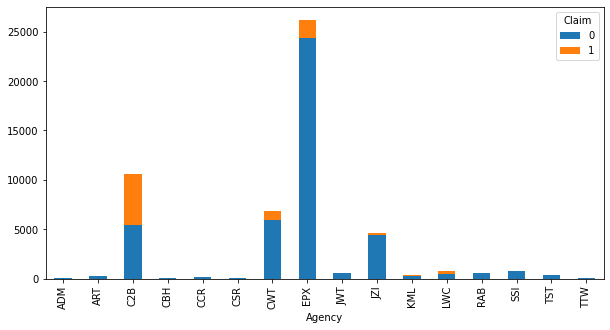

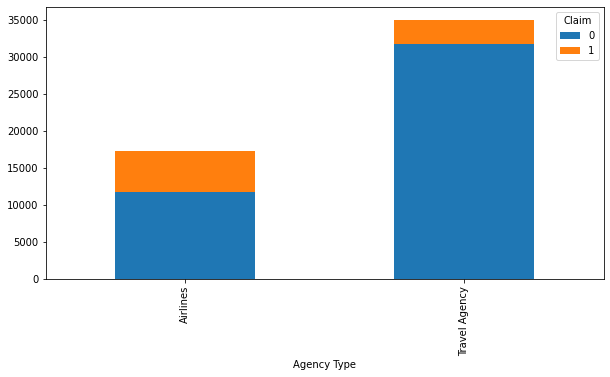

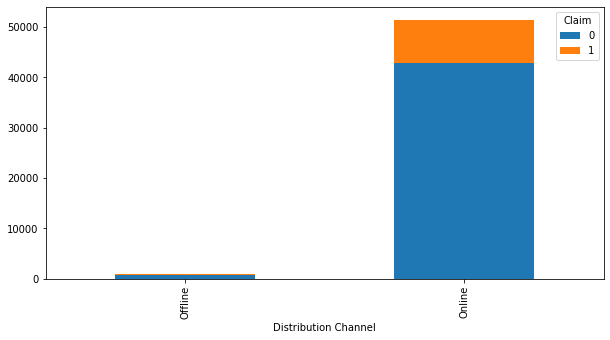

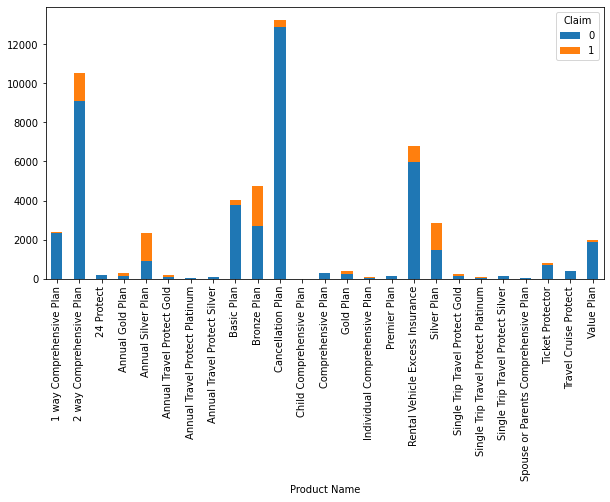

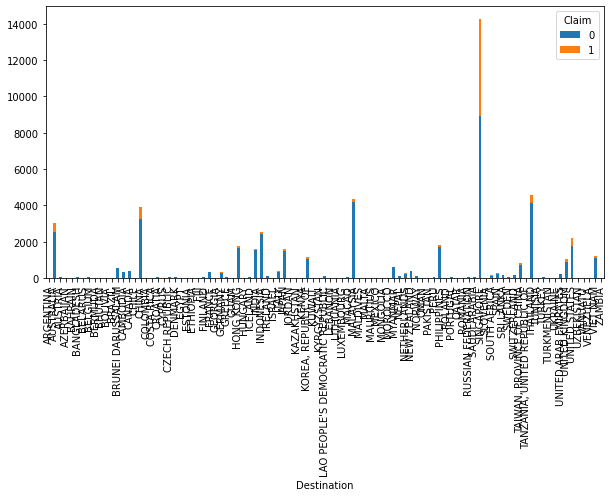

In [18]:
for i in dataframe_cat:
    df.groupby(i)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

## Plot a histogram for all the continuous variables to check for skewness

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

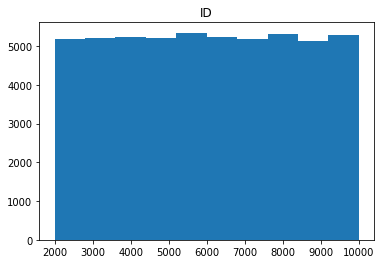

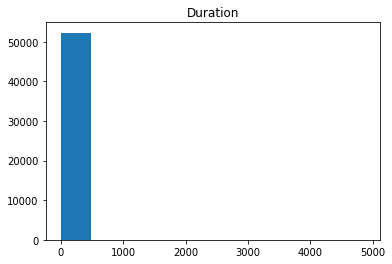

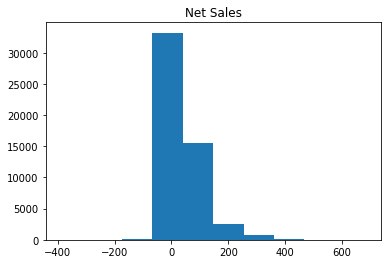

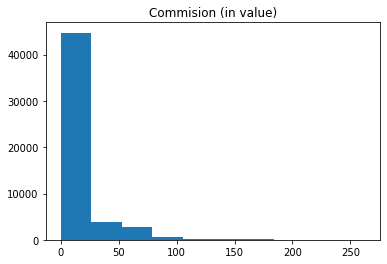

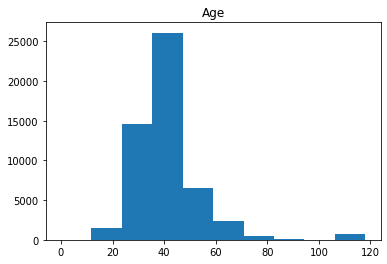

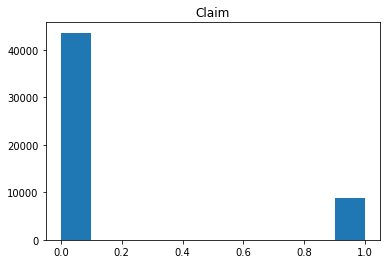

In [17]:
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

## Get a count of the target variable and note down your observations

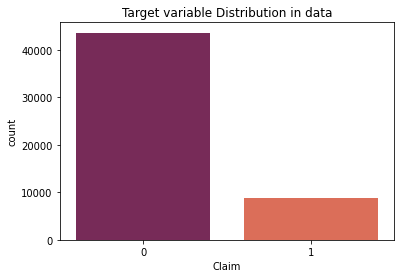

In [15]:
sns.countplot(df['Claim'],palette='rocket')
plt.title("Target variable Distribution in data");

**Our data is higly imbalanced data**

## Need to check with the data whether it's balanced or imbalanced

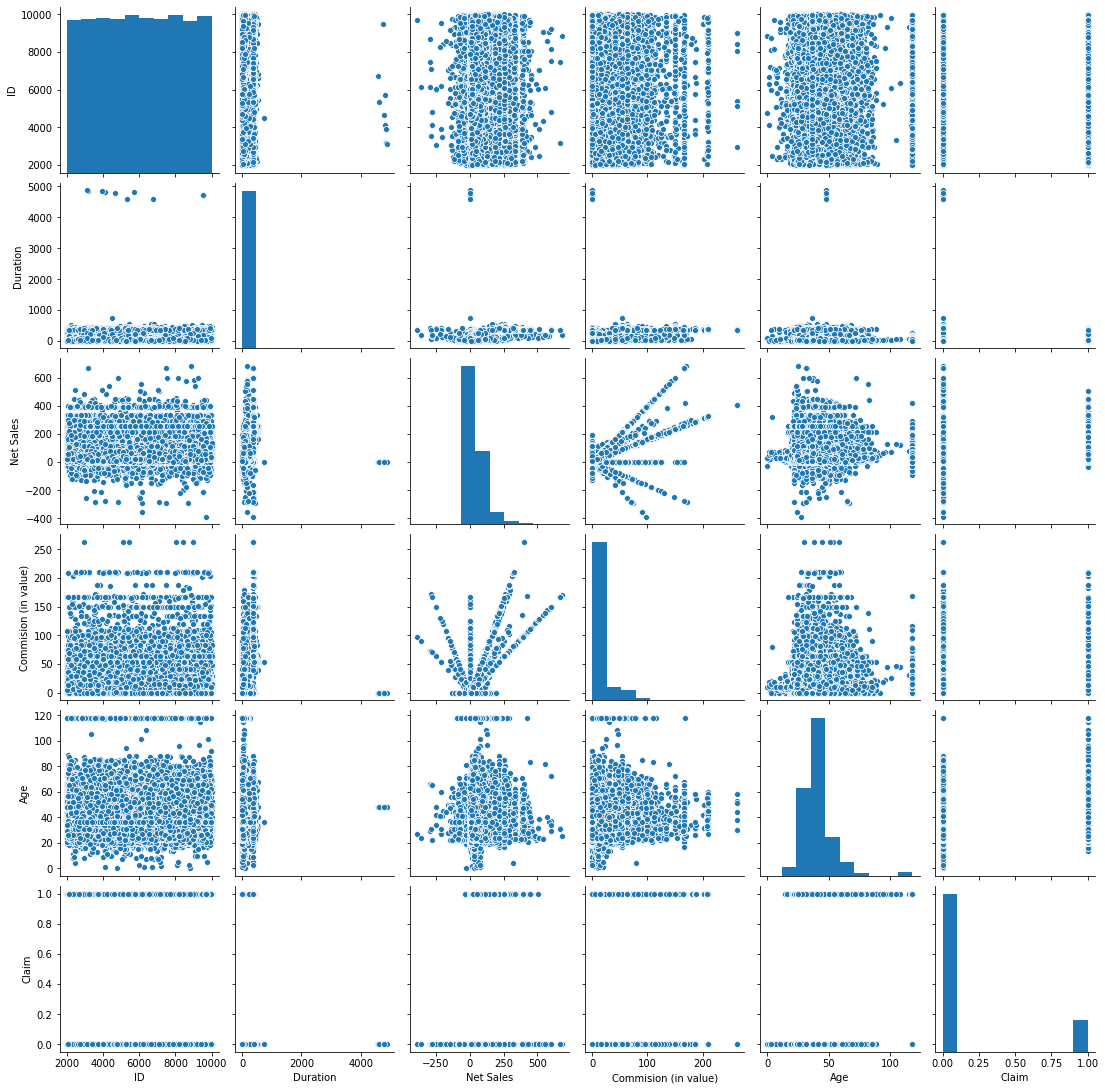

In [17]:
pairPlot = sns.pairplot(df)

In [11]:
df['Agency'].value_counts()

EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

In [13]:
df['Agency Type'].value_counts()

Travel Agency    34996
Airlines         17314
Name: Agency Type, dtype: int64

In [14]:
df['Distribution Channel'].value_counts()

Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

In [15]:
df['Product Name'].value_counts()

Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

In [25]:
df['Duration'].value_counts()

5       1623
6       1613
8       1548
7       1528
10      1504
        ... 
434        1
529        1
497        1
4580       1
436        1
Name: Duration, Length: 439, dtype: int64

In [17]:
df['Destination'].value_counts()

SINGAPORE       14242
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BHUTAN              2
BELARUS             2
BERMUDA             2
TURKMENISTAN        1
ZAMBIA              1
Name: Destination, Length: 97, dtype: int64

In [18]:
df['Net Sales'].value_counts()

20.000000    4245
10.000000    3320
22.000000    1640
0.000000     1337
18.000000    1163
             ... 
53.259105       1
47.907555       1
10.602174       1
19.291379       1
93.407102       1
Name: Net Sales, Length: 6700, dtype: int64

In [29]:
df['Commision (in value)'].value_counts().unique()

array([26260,  1150,  1142,   953,   835,   824,   730,   659,   658,
         647,   617,   559,   495,   412,   395,   380,   372,   341,
         294,   270,   242,   241,   235,   226,   225,   208,   177,
         164,   161,   154,   143,   139,   132,   121,   120,   112,
         110,   104,   102,    94,    93,    91,    90,    86,    83,
          82,    77,    76,    73,    68,    67,    65,    62,    56,
          55,    52,    50,    48,    47,    45,    44,    43,    42,
          41,    39,    38,    37,    36,    35,    34,    33,    32,
          31,    29,    28,    27,    26,    24,    23,    22,    21,
          20,    19,    18,    17,    16,    15,    14,    13,    12,
          11,    10,     9,     8,     7,     6,     5,     4,     3,
           2,     1], dtype=int64)

In [28]:
df['Age'].value_counts()

36    17979
31     2284
35     1985
48     1823
30     1371
      ...  
4         1
96        1
92        1
94        1
2         1
Name: Age, Length: 99, dtype: int64

In [27]:
df['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [26]:
df['Claim'].value_counts(normalize=True).round(5)


0    0.8333
1    0.1667
Name: Claim, dtype: float64

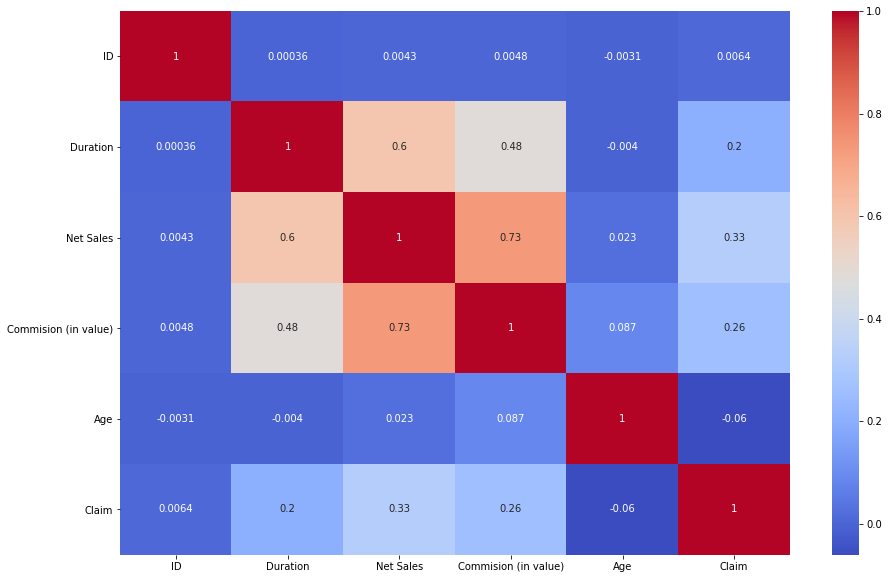

In [30]:
#check coorelation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')


In [50]:
df.corr()['Claim'].sort_values()

Age                    -0.060228
ID                      0.006393
Duration                0.201583
Commision (in value)    0.258688
Net Sales               0.326799
Claim                   1.000000
Name: Claim, dtype: float64

### Check for skewness in the continuous data

In [20]:
from scipy.stats import skew

In [21]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,Duration,15.352083
1,Net Sales,2.811757
2,Commision (in value),3.535593
3,Age,2.947807
4,Claim,1.788547


(array([], dtype=float64), [])

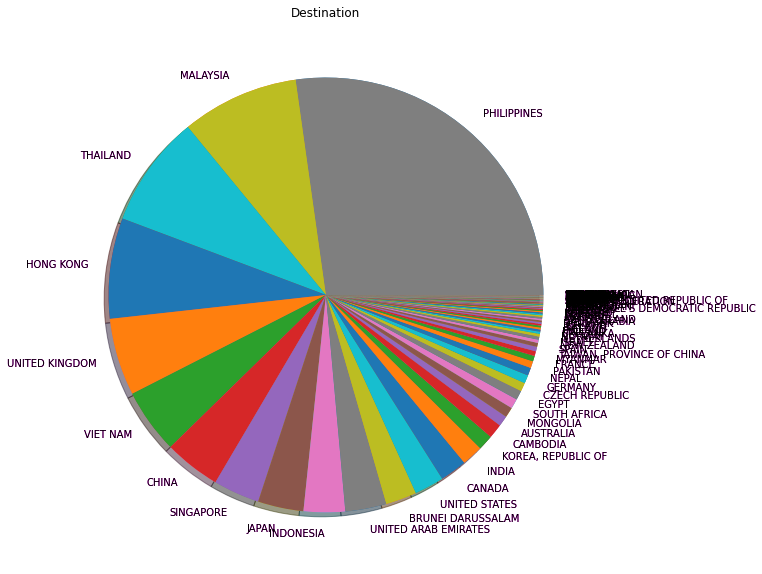

In [24]:
#checking distriubution for destination in dataset, Please ignore the mess at pie we can consider those as others
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(df['Destination'].value_counts(),    
                                  labels = df['Destination'].unique(), 
                                  shadow = True,
                                  textprops = dict(color ="magenta")) 


plt.pie(df['Destination'].value_counts(),labels=df['Destination'].unique())
plt.title('Destination')
plt.xticks(rotation=45)

Age distribution according to Response


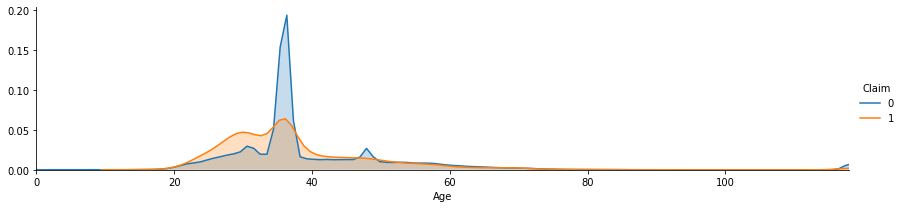

In [37]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df,hue="Claim",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df["Age"].max()))
facetgrid.add_legend()
plt.show()

Duration distribution according to Response


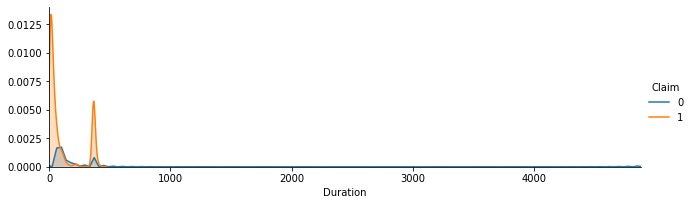

In [45]:
print("Duration distribution according to Response")
facetgrid = sns.FacetGrid(df,hue="Claim",aspect = 3)
facetgrid.map(sns.kdeplot,"Duration",shade = True)
facetgrid.set(xlim = (0,df["Duration"].max()))
facetgrid.add_legend()
plt.show()

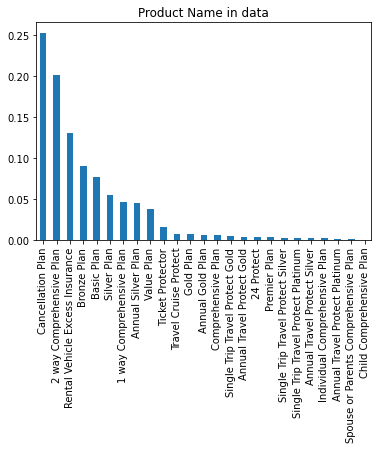

In [51]:
df['Product Name'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Product Name in data")

plt.show()

## What can we observe from the dataframe_categorical

**Agency Type** :
    drop<br>
**Agency** :
    drop<br>
**Distribution Channel** :
    Drop<br>
**Product Name** :
    Retain<br>

## What can we observe from the dataframe_Numerical

**ID** :
    Drop<br>
**Duration** :
    Retain<br>
**Net Sale** :
    Drop<br>
**Commision** :
    Drop<br>
**Age** :
    Retain<br>

In [18]:
dataframe_con.drop(['ID'],1,inplace=True)

In [32]:
df=df[df['Net Sales'] > 0]

df['Net Sales'].describe()

count    50470.000000
mean        50.911040
std         59.545138
min          0.070000
25%         20.000000
50%         29.700000
75%         58.000000
max        682.000000
Name: Net Sales, dtype: float64

In [32]:
df[df['Duration'] > 540 ].shape


(12, 11)

In [33]:
df[df['Age'] > 99 ].shape

(737, 11)

In [17]:
#Checking for duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (2, 11)


In [19]:
#Checking for duplicate ID
print('Number of duplicate IDs: {}'.format(df.duplicated(subset = 'ID').value_counts()))

Number of duplicate IDs: True     44318
False     7992
dtype: int64


In [33]:
df_onehot = df.copy()

In [34]:
#Droping target variable from train set
y=df['Claim']
df.drop('Claim',axis=1,inplace=True)

sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

**Performing same modfications on test data as done on train data**

In [14]:
#Label Encoding distribution channel --- 0 is online and 1 is offline 
df["Distribution Channel"] = encoder.fit_transform(df["Distribution Channel"])
# Label Encoding Agency
df["Agency"] = encoder.fit_transform(df["Agency"])
# Label Encoding Agency Type
df["Agency Type"] = encoder.fit_transform(df["Agency Type"])
# Label Encoding Product Name
df["Product Name"] = encoder.fit_transform(df["Product Name"])

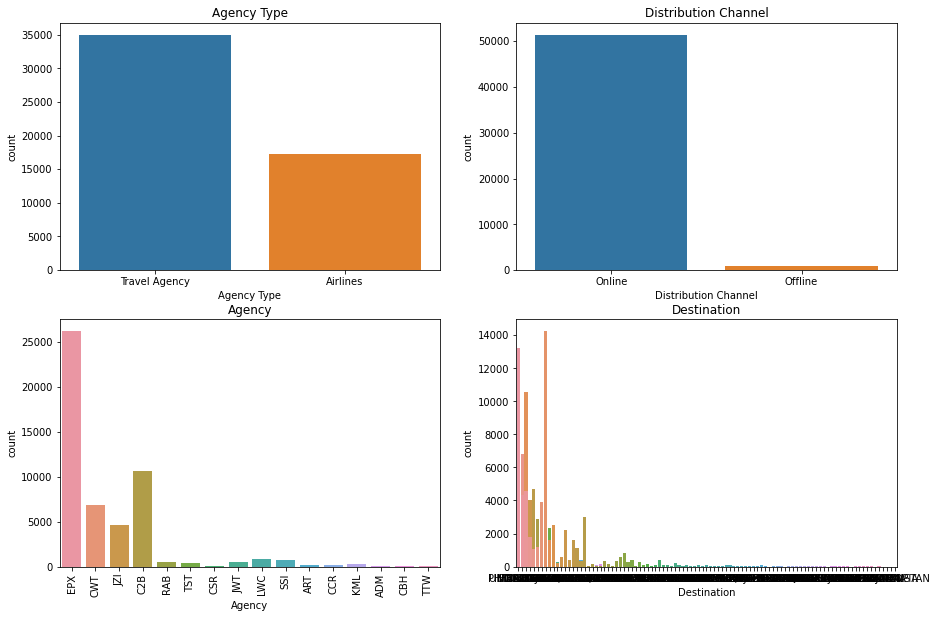

In [16]:
# Plotting Agency Type
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Agency Type'])
plt.title('Agency Type')
plt.savefig('Agency_Type.png', dpi=300, bbox_inches='tight')

# Plotting Distribution Channel
plt.subplot(2,2,2)
sns.countplot(df['Distribution Channel'])
plt.title('Distribution Channel')
plt.savefig('Distribution_Channel.png', dpi=300, bbox_inches='tight')

#Plotting Agency
plt.subplot(2,2,3)
sns.countplot(df['Agency'])
plt.xticks(rotation=90)
plt.title('Agency')
plt.savefig('Agency.png', dpi=300, bbox_inches='tight')

plt.subplot(2,2,4)
sns.countplot(df['Product Name'])
plt.title('Product Name')
plt.savefig('Product_Name.png', dpi=300, bbox_inches='tight')


plt.subplot(2,2,4)
sns.countplot(df['Destination'])
plt.title('Destination')
plt.savefig('Destination_Name.png', dpi=300, bbox_inches='tight')

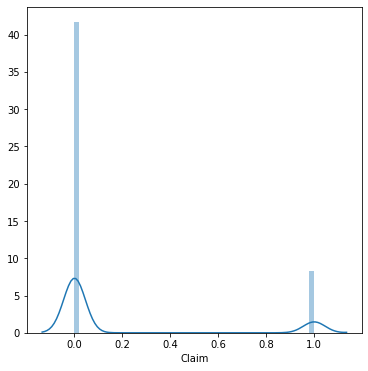

In [21]:
#Plotting a histogram for Claim column before cleaning
plt.figure(figsize=(6,6))
sns.distplot(df['Claim'])
plt.show()

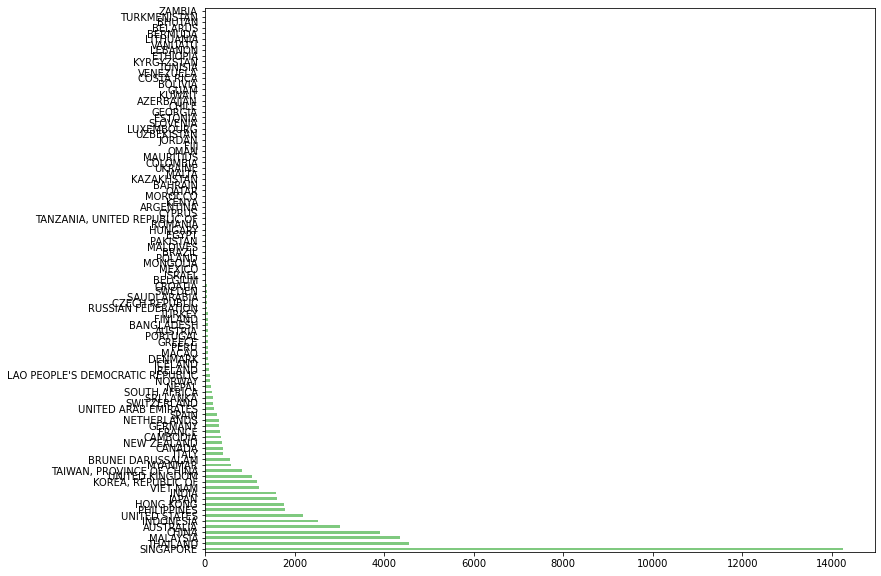

In [38]:
df['Destination'].value_counts().plot(kind='barh',cmap='Accent',figsize=(12,10))

plt.show()